In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import time

In [2]:
from pylab import *
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

In [3]:
model = RandomForestRegressor(n_estimators=20, min_samples_leaf=5, n_jobs= 5)

In [6]:
data = []
labels = []

for i in np.random.choice(2000,2000, replace=False):
    sims = np.load('/mnt/ceph/users/fvillaescusa/Ana/Fourier_grid/density_fields/df_Fourier_64_%d.npy'%(i))
    data.append(sims)
    cosmo_params = np.loadtxt('//mnt/ceph/users/fvillaescusa/Ana/latin_hypercube/latin_hypercube_params.txt')[i]
    labels.append(cosmo_params)

In [7]:
data = np.array(data).reshape(len(data),-1)
labels = np.array(labels)

In [9]:
labels.shape

(2000, 5)

In [10]:
start= time.time()
X_train, X_test, y_train, y_test = train_test_split(data, labels, \
                                                                    test_size=0.2, random_state=0)
model.fit(X_train, y_train)
print('Time (m):', "{:.4f}".format((time.time()-start)/60.0))

Time (m): 7.5129


In [16]:
np.save('test_data_fourier_rf', y_test)

In [11]:
ypred=model.predict(X_test)

In [17]:
np.save('pred_data_fourier_rf', ypred)

In [12]:
def obtain_cosmo_params_rmse(test_data, prediction_data, title):
    scores={}
    maxmin={}
    om_score =np.sqrt(metrics.mean_squared_error(test_data[:,0],prediction_data[:,0]))
    ob_score =np.sqrt(metrics.mean_squared_error(test_data[:,1],prediction_data[:,1]))
    h_score =np.sqrt(metrics.mean_squared_error(test_data[:,2],prediction_data[:,2]))
    ns_score =np.sqrt(metrics.mean_squared_error(test_data[:,3],prediction_data[:,3]))
    s8_score =np.sqrt(metrics.mean_squared_error(test_data[:,4],prediction_data[:,4]))
    scores.update([('omega m rmse', om_score)])
    scores.update([('omega b rmse', ob_score)])
    scores.update([('h rmse', h_score)])
    scores.update([('Ns rmse', ns_score)])
    scores.update([('sigma 8 rmse', s8_score)])
    np.save(title, scores)
    
    maxmin.update([(('omega m min', np.min(prediction_data[:,0])), ('omega m max', np.max(prediction_data[:,0])))])
    maxmin.update([(('omega b min', np.min(prediction_data[:,1])), ('omega b max', np.max(prediction_data[:,1])))])
    maxmin.update([(('h min', np.min(prediction_data[:,2])), ('h max', np.max(prediction_data[:,2])))])
    maxmin.update([(('Ns min', np.min(prediction_data[:,3])), ('Ns max', np.max(prediction_data[:,3])))])
    maxmin.update([(('sigma 8 min', np.min(prediction_data[:,4])), ('sigma 8 max', np.max(prediction_data[:,4])))])
    
    return scores, maxmin

In [13]:
obtain_cosmo_params_rmse(y_test, ypred, 'fourier_rf_scores.txt')

({'omega m rmse': 0.07236855993795575,
  'omega b rmse': 0.011284064668109628,
  'h rmse': 0.1189296944329025,
  'Ns rmse': 0.11656122400015775,
  'sigma 8 rmse': 0.07447972881305649},
 {('omega m min', 0.16764815981240982): ('omega m max', 0.4125608681639997),
  ('omega b min', 0.0467381744047619): ('omega b max', 0.05407794651010754),
  ('h min', 0.6430980187590186): ('h max', 0.7761728633354951),
  ('Ns min', 0.924092461094461): ('Ns max', 1.0917623175654756),
  ('sigma 8 min', 0.6903787572150072): ('sigma 8 max', 0.9109364994449995)})

<Figure size 432x288 with 0 Axes>

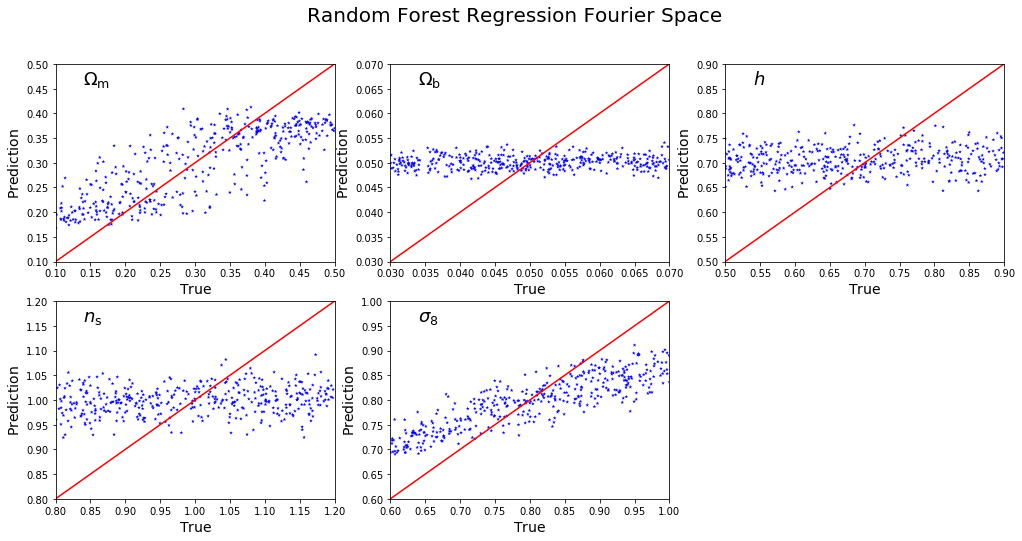

In [18]:
fig = figure()
fig = figure(figsize=(17,8))     #give dimensions to the figure

#gs =  gridspec.GridSpec(2,3,height_ratios=[1,1,1],width_ratios[1,1])
gs =  gridspec.GridSpec(2,3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[5])

x_min, x_max = 0.1, 0.5
y_min, y_max = 0.1, 0.5

param_min = [0.1, 0.03, 0.5, 0.8, 0.6]
param_max = [0.5, 0.07, 0.9, 1.2, 1.0]

label = [r"$\Omega_{\rm m}$", r"$\Omega_{\rm b}$", r"$h$",
         r"$n_{\rm s}$", r"$\sigma_8$"]

x_dumb = np.linspace(-15,15,100) #larger values for when outliers are included in plot


#f1 = '../results.txt'
#f_out='../plots/NN_cosmo_params_32.pdf'
#data = np.loadtxt(f1)

for i,ax in enumerate([ax1,ax2,ax3,ax4,ax5]):

    ax.set_xlim([param_min[i],param_max[i]])
    ax.set_ylim([param_min[i],param_max[i]])
    #ax.set_xlim([np.min(ypred_all[:,i]), np.max(ypred_all[:,i])]) #for plotting the ouliers
    #ax.set_ylim([1.05*np.min(ypred_all[:,i]), 1.05*np.max(ypred_all[:,i])]) #for plotting the outliers

    ax.set_xlabel(r'${\rm True}$',fontsize=14)
    ax.set_ylabel(r'${\rm Prediction}$',fontsize=14)
    
    #p1=ax.scatter(y_test_ncv[:,i], ypred_ncv[:,i],c='b',edgecolor='none',s=15,marker='*', label='no cosmic variance')
    ax.plot(x_dumb, x_dumb, linestyle='-', c='r')
    ax.scatter(y_test[:,i], ypred[:,i],c='b',edgecolor='none',s=15,marker='*')

    posx = param_min[i] + 0.1*(param_max[i] - param_min[i])
    posy = param_min[i] + 0.9*(param_max[i] - param_min[i])
    ax.text(posx, posy, label[i], size=18)
    
    #ax.legend(loc='lower right')

#plt.savefig('RF_NCV_all_present.jpg')

#place a label in the plot
#ax1.text(0.2,0.1, r"$z=4.0$", fontsize=22, color='k')

#legend
#ax1.legend([p1,p2],
#           [r"$z=3$",
#            r"$z=4$"],
#           loc=0,prop={'size':18},ncol=1,frameon=True)
            
            #columnspacing=2,labelspacing=2)




#ax1.set_title(r'$\sum m_\nu=0.0\/{\rm eV}$',position=(0.5,1.02),size=18)
#title('About as simple as it gets, folks')
suptitle('Random Forest Regression Fourier Space', fontsize=20)  #for title with several panels
#grid(True)
#show()
savefig('RF_Fourier_9_15.pdf', bbox_inches='tight')
#close(fig)

from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(title)
    return plt

plot_learning_curve(LinearRegression(), 'Curve_LR_NCV_all_params.pdf', all_data, all_labels)

plot_learning_curve(RandomForestRegressor(), 'Curve_RF_NCV_all_params.pdf', \
                    all_data, all_labels, n_jobs=5)